In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#carga el csv
data = pd.read_csv("archivos/Telco_customer_churn_services.csv")

#eliminar datos vacios

# 1️⃣ Eliminar valores nulos
data = data.dropna()

# 2️⃣ Eliminar valores duplicados
data = data.drop_duplicates()

# 3️⃣ Eliminar valores atípicos en "Monthly Charge" usando rango intercuartil (IQR)
Q1 = data['Monthly Charge'].quantile(0.25)
Q3 = data['Monthly Charge'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Monthly Charge'] >= Q1 - 1.5 * IQR) & (data['Monthly Charge'] <= Q3 + 1.5 * IQR)]

# 4️⃣ Eliminar filas con valores no deseados en "Contract" (ejemplo: eliminar Month-to-Month)
data = data[data['Contract'] != 'Month-to-Month']


#guardar en postgres







/tmp/ipykernel_23279/3075474822.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=data, ax=axes[0, 1], palette='viridis')


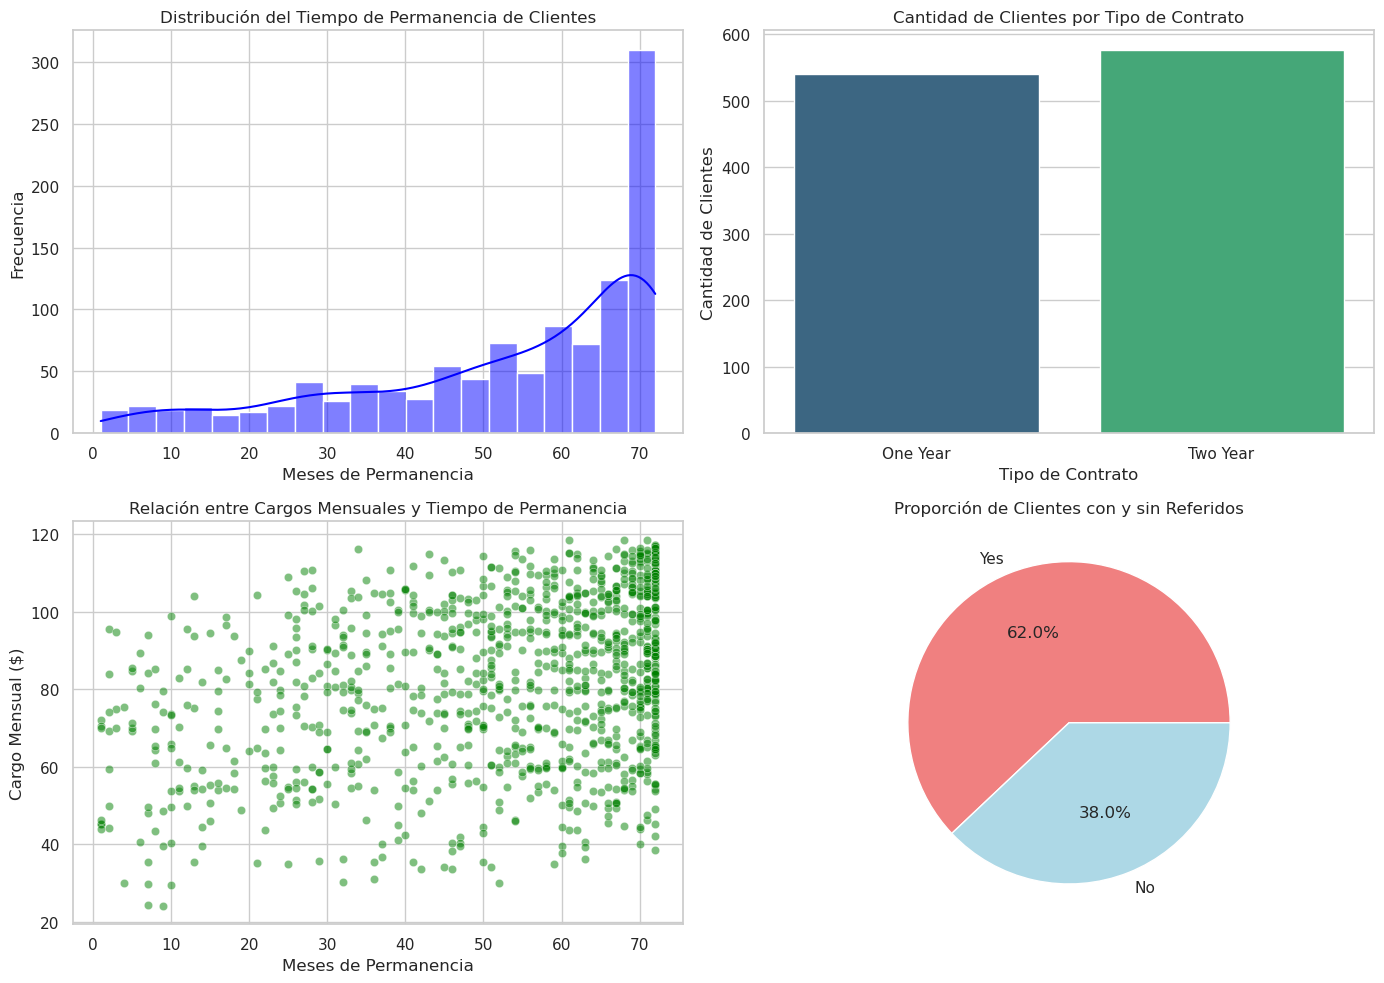

In [12]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear figura con 2x2 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Histograma de "Tenure in Months" (Tiempo de permanencia de clientes)
sns.histplot(data['Tenure in Months'], bins=20, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribución del Tiempo de Permanencia de Clientes')
axes[0, 0].set_xlabel('Meses de Permanencia')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Gráfico de barras de cantidad de clientes por tipo de contrato
sns.countplot(x='Contract', data=data, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Cantidad de Clientes por Tipo de Contrato')
axes[0, 1].set_xlabel('Tipo de Contrato')
axes[0, 1].set_ylabel('Cantidad de Clientes')

# Gráfico 3: Gráfico de dispersión de cargos mensuales vs tiempo de permanencia
sns.scatterplot(x='Tenure in Months', y='Monthly Charge', data=data, ax=axes[1, 0], alpha=0.5, color='green')
axes[1, 0].set_title('Relación entre Cargos Mensuales y Tiempo de Permanencia')
axes[1, 0].set_xlabel('Meses de Permanencia')
axes[1, 0].set_ylabel('Cargo Mensual ($)')

# Gráfico 4: Gráfico de pastel sobre clientes que refirieron a un amigo
data['Referred a Friend'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], colors=['lightcoral', 'lightblue'])
axes[1, 1].set_title('Proporción de Clientes con y sin Referidos')
axes[1, 1].set_ylabel('')  # Ocultar etiqueta del eje Y

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()